<a href="https://colab.research.google.com/github/deveshsingh14/Stock-Market-Analysis-and-Prediction-using-LSTM/blob/main/StockML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stock Market Analysis and Prediction using LSTM
By : Devesh Singh

In [ ]:
!pip install -q yfinance
!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf
import pandas_datareader.data as pdr  # Import the pandas_datareader library
from datetime import datetime  # Import datetime module


Descriptive Statistics about the Data

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Set up the style
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

# Download the stock data using yfinance directly
company_list = []
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for stock, com_name in zip(tech_list, company_name):
    stock_data = yf.download(stock, start, end)
    stock_data['company_name'] = com_name
    company_list.append(stock_data)

# Concatenate the data
df = pd.concat(company_list, axis=0)

# Show the last 10 rows
df.tail(10)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume,company_name,Close,High,Low,Open,...,Close,High,Low,Open,Volume,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,GOOG,GOOG,GOOG,GOOG,...,MSFT,MSFT,MSFT,MSFT,MSFT,AMZN,AMZN,AMZN,AMZN,AMZN
Date,,,,,,,,,,,,,,,,,,,,,
2025-01-14,NaN,NaN,NaN,NaN,NaN,AMAZON,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,217.759995,221.820007,216.199997,220.440002,24711700.0
2025-01-15,NaN,NaN,NaN,NaN,NaN,AMAZON,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,223.350006,223.570007,220.750000,222.830002,31291300.0
2025-01-16,NaN,NaN,NaN,NaN,NaN,AMAZON,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,220.660004,224.649994,220.309998,224.419998,24757300.0
2025-01-17,NaN,NaN,NaN,NaN,NaN,AMAZON,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,225.940002,226.509995,223.080002,225.839996,42370100.0
2025-01-21,NaN,NaN,NaN,NaN,NaN,AMAZON,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,230.710007,231.779999,226.940002,228.899994,39951500.0
2025-01-22,NaN,NaN,NaN,NaN,NaN,AMAZON,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,235.009995,235.440002,231.190002,232.020004,41448200.0
2025-01-23,NaN,NaN,NaN,NaN,NaN,AMAZON,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,235.419998,235.520004,231.509995,234.100006,26404400.0
2025-01-24,NaN,NaN,NaN,NaN,NaN,AMAZON,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,234.850006,236.399994,232.929993,234.500000,25890700.0


In [ ]:
# Summary Stats
apple_data = df[df['company_name'] == 'APPLE']  # Extract data for APPLE
apple_data.describe()  # Now call describe() on the extracted data

Price,Close,High,Low,Open,Volume,Close,High,Low,Open,Volume,Close,High,Low,Open,Volume,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,GOOG,GOOG,GOOG,GOOG,GOOG,MSFT,MSFT,MSFT,MSFT,MSFT,AMZN,AMZN,AMZN,AMZN,AMZN
count,251.000000,251.000000,251.000000,251.000000,2.510000e+02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,210.052896,211.860204,207.997913,209.845340,5.723235e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,26.027965,26.125180,25.628748,25.880653,3.108330e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,164.405121,165.800067,163.488440,164.753864,2.323470e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,184.658409,186.256828,182.886122,185.061139,4.123235e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,220.577332,222.465248,217.240993,219.789993,4.977270e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,228.442070,230.153398,226.535004,228.615927,6.340070e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,259.019989,260.100006,257.630005,258.190002,3.186799e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Information About the Data

In [ ]:
# General info
apple_data.info()  # Use apple_data, which holds the APPLE stock data

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2024-01-29 to 2025-01-28
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   (Close, AAPL)     251 non-null    float64
 1   (High, AAPL)      251 non-null    float64
 2   (Low, AAPL)       251 non-null    float64
 3   (Open, AAPL)      251 non-null    float64
 4   (Volume, AAPL)    251 non-null    float64
 5   (company_name, )  251 non-null    object 
 6   (Close, GOOG)     0 non-null      float64
 7   (High, GOOG)      0 non-null      float64
 8   (Low, GOOG)       0 non-null      float64
 9   (Open, GOOG)      0 non-null      float64
 10  (Volume, GOOG)    0 non-null      float64
 11  (Close, MSFT)     0 non-null      float64
 12  (High, MSFT)      0 non-null      float64
 13  (Low, MSFT)       0 non-null      float64
 14  (Open, MSFT)      0 non-null      float64
 15  (Volume, MSFT)    0 non-null      float64
 16  (Close, AMZN)     0 non-n

# Closing Price
The closing price is the last price at which the stock is traded during the regular trading day. A stock’s closing price is the standard benchmark used by investors to track its performance over time.

<Figure size 1500x500 with 0 Axes>

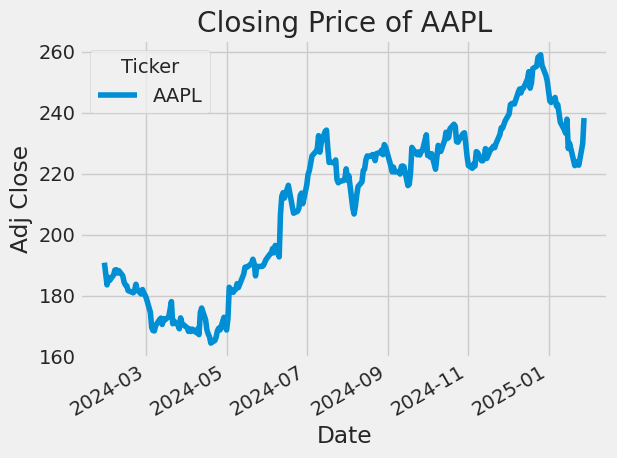

In [ ]:
import matplotlib.pyplot as plt

# Choose the first company in company_list for this example
company = company_list[0]

# Create the plot for the single company's data
plt.figure(figsize=(15, 5))  # Adjust the size as needed
if 'Adj Close' in company.columns:
    company['Adj Close'].plot()
elif 'Close' in company.columns:
    company['Close'].plot()  # Use 'Close' column if 'Adj Close' is not found
else:
    raise KeyError("Neither 'Adj Close' nor 'Close' column found in the DataFrame")  # Raise an error if neither is found

plt.ylabel('Adj Close')
plt.xlabel('Date')
plt.title(f"Closing Price of {tech_list[0]}")  # Adjust the title as needed
plt.tight_layout()  # Adjust layout for better spacing
plt.show()


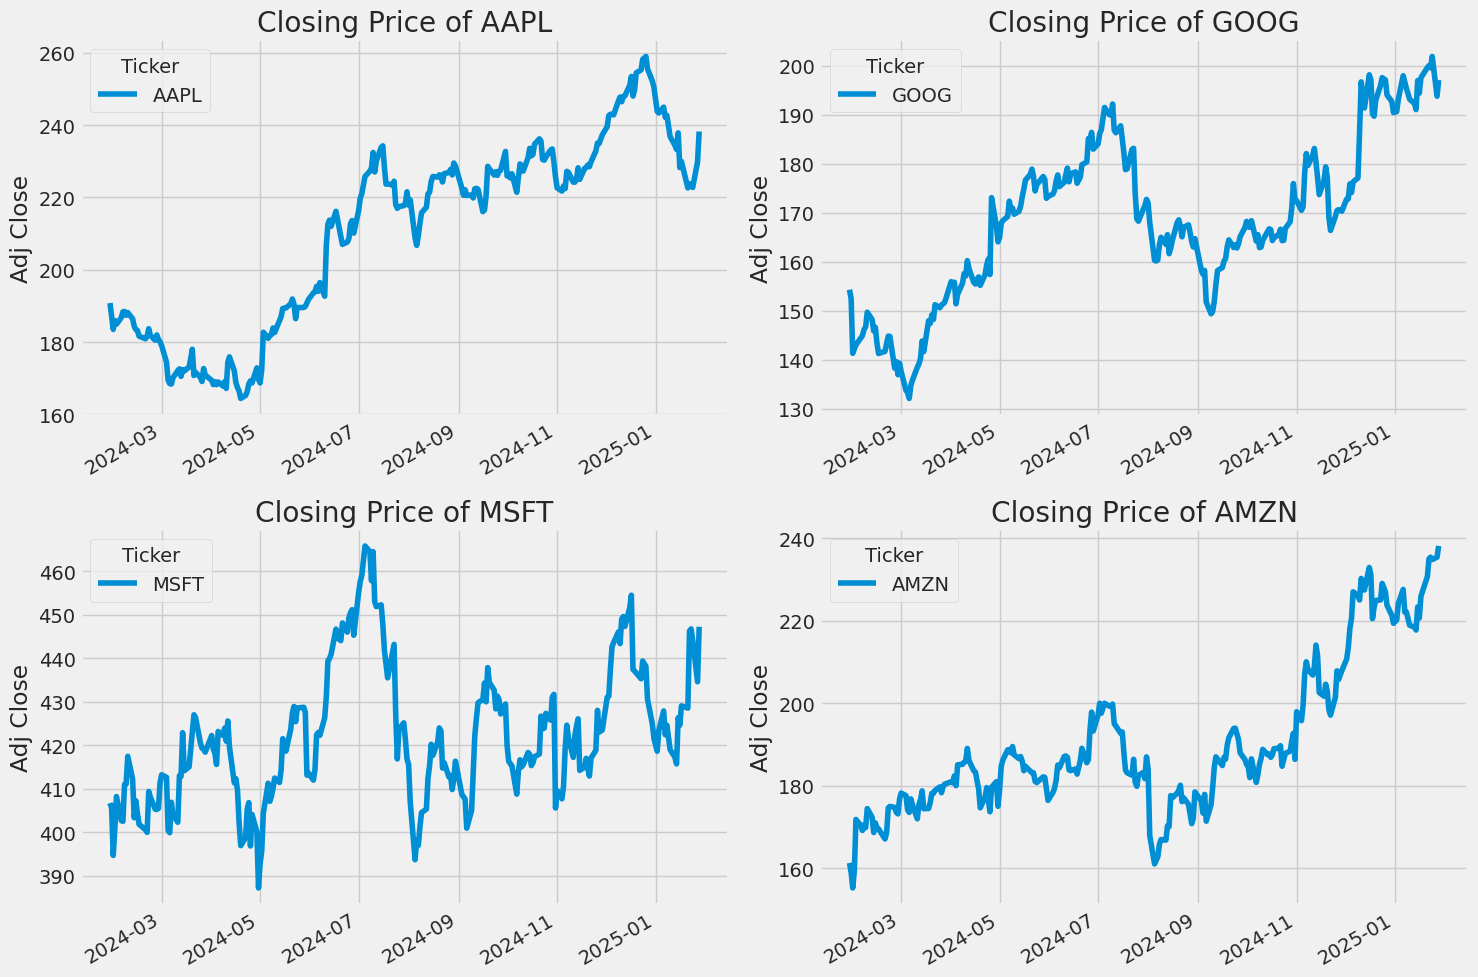

In [ ]:
import matplotlib.pyplot as plt

# Set the figure size and create subplots (2 rows, 2 columns)
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Loop through each company and plot on each subplot
for i, (company, ax) in enumerate(zip(company_list, axes.flatten()), 1):
    # Check if 'Adj Close' exists, otherwise try 'Close'
    if 'Adj Close' in company.columns:
        company['Adj Close'].plot(ax=ax)
    elif 'Close' in company.columns:
        company['Close'].plot(ax=ax)  # Use 'Close' column if 'Adj Close' is not found
    else:
        raise KeyError("Neither 'Adj Close' nor 'Close' column found in the DataFrame")  # Raise an error if neither is found

    # Set labels and titles
    ax.set_ylabel('Adj Close')
    ax.set_xlabel(None)
    ax.set_title(f"Closing Price of {tech_list[i - 1]}")

# Adjust layout for better spacing between subplots
plt.tight_layout()
plt.show()


# Volume of Sales
Volume is the amount of an asset or security that changes hands over some period of time, often over the course of a day. For instance, the stock trading volume would refer to the number of shares of security traded between its daily open and close. Trading volume, and changes to volume over the course of time, are important inputs for technical traders.

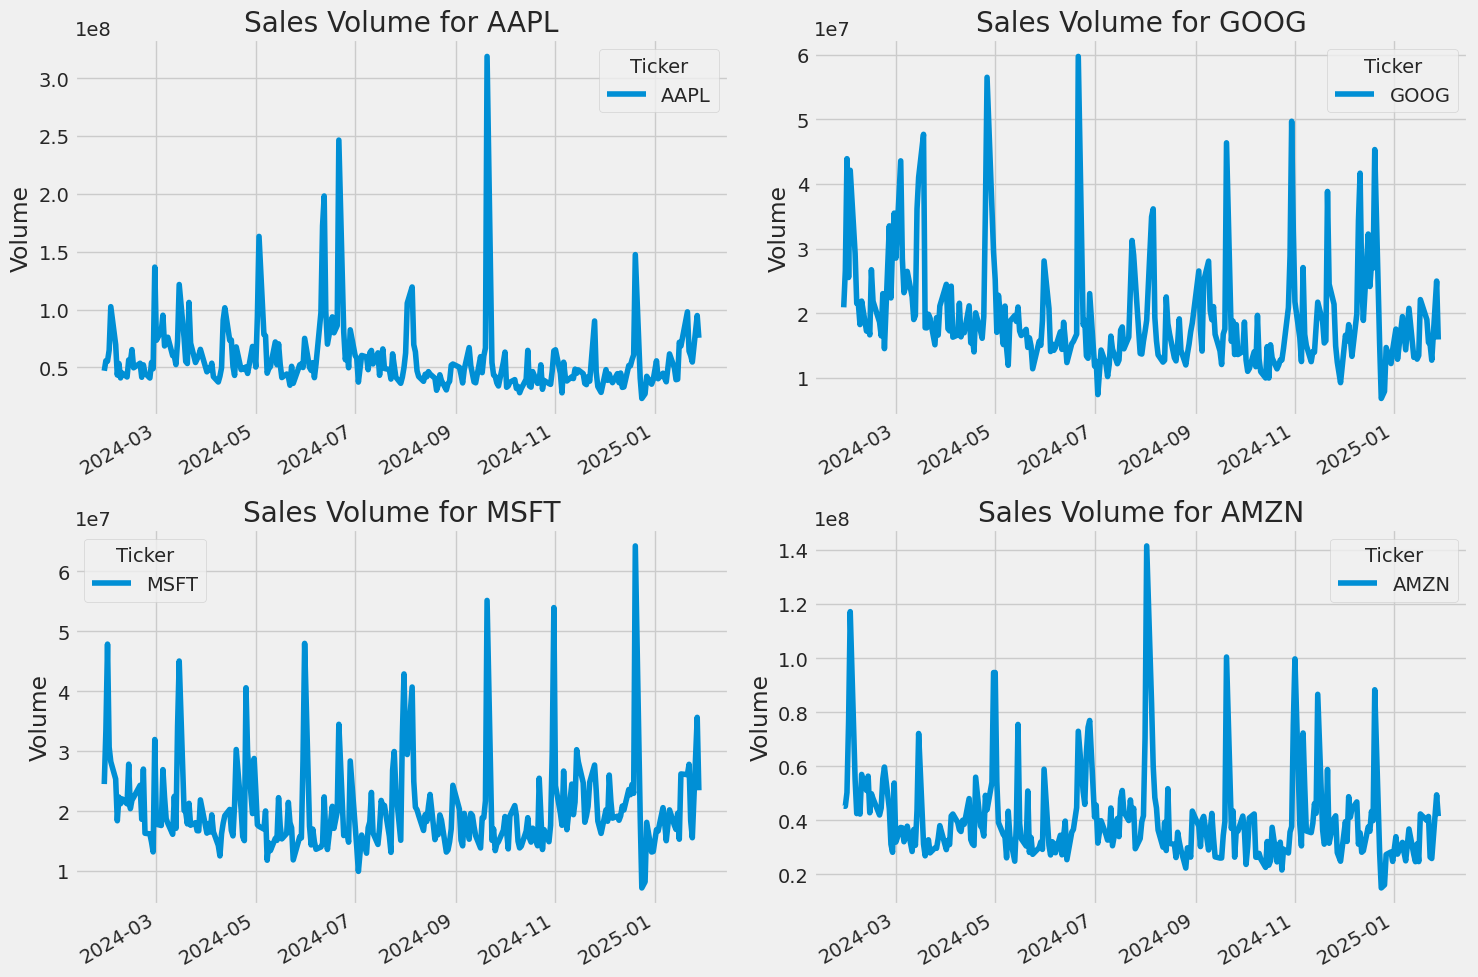

In [ ]:
import matplotlib.pyplot as plt

# Set the figure size and create subplots (2 rows, 2 columns)
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Loop through each company and plot the volume on each subplot
for i, (company, ax) in enumerate(zip(company_list, axes.flatten()), 1):
    # Plot the 'Volume' for each company on the corresponding subplot
    company['Volume'].plot(ax=ax)

    # Set labels and titles
    ax.set_ylabel('Volume')
    ax.set_xlabel(None)
    ax.set_title(f"Sales Volume for {tech_list[i - 1]}")

# Adjust layout for better spacing between subplots
plt.tight_layout()
plt.show()


# 2. What was the moving average of the various stocks?
The moving average (MA) is a simple technical analysis tool that smooths out price data by creating a constantly updated average price. The average is taken over a specific period of time, like 10 days, 20 minutes, 30 weeks, or any time period the trader chooses.

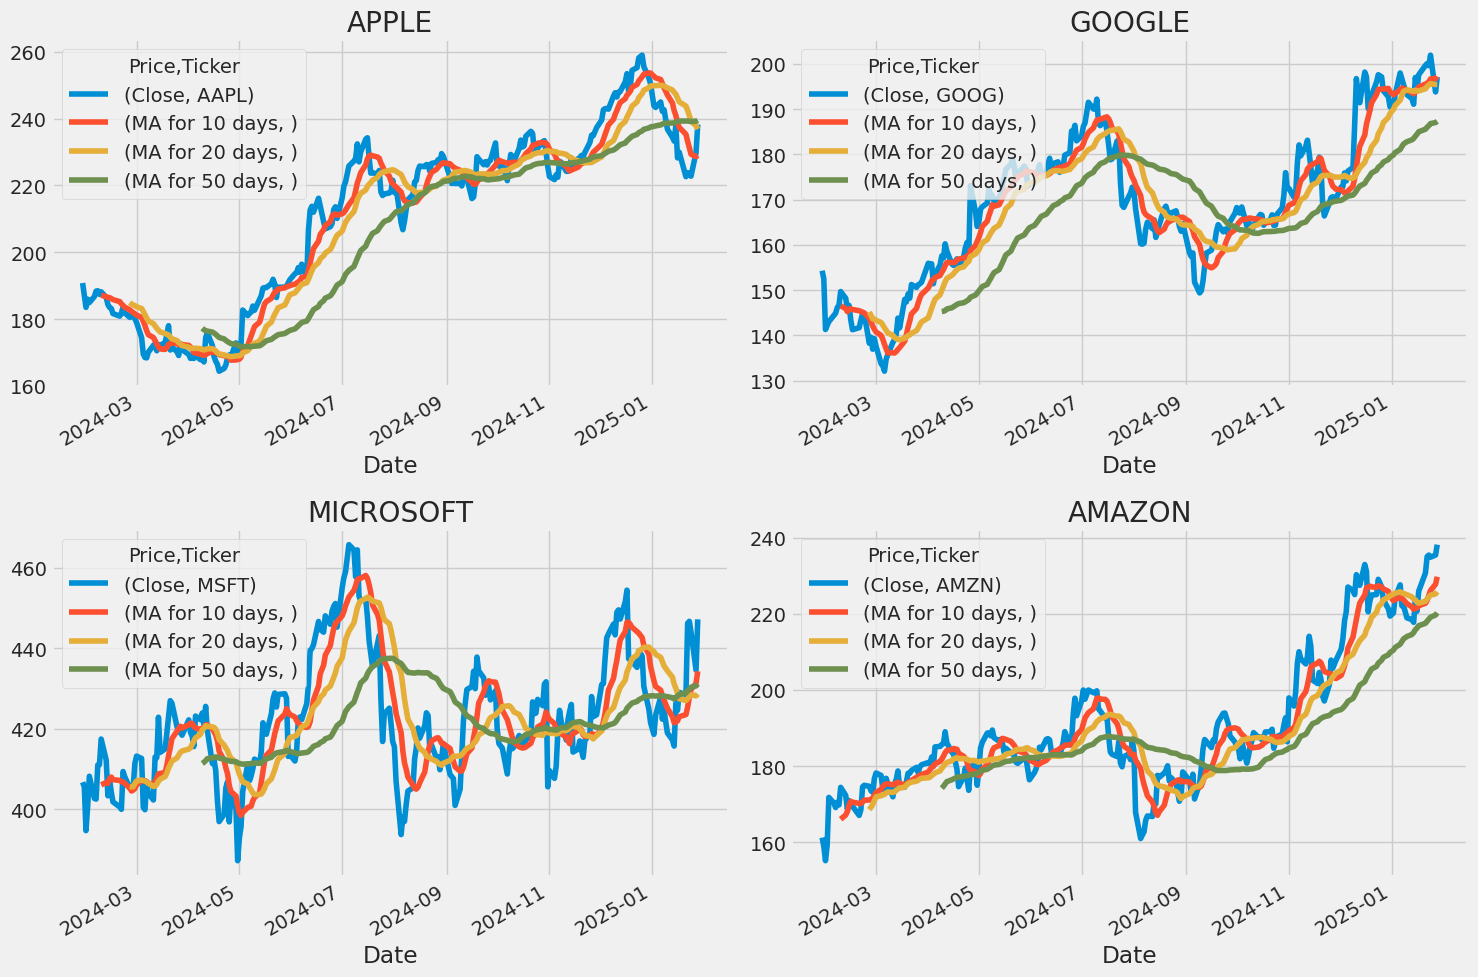

In [ ]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        # Use 'Adj Close' if available, otherwise fall back to 'Close'
        price_column = 'Adj Close' if 'Adj Close' in company.columns else 'Close'
        company[column_name] = company[price_column].rolling(ma).mean()

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

# Access the company DataFrames using their index in company_list
company_list[0][['Adj Close' if 'Adj Close' in company_list[0].columns else 'Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

company_list[1][['Adj Close' if 'Adj Close' in company_list[1].columns else 'Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

company_list[2][['Adj Close' if 'Adj Close' in company_list[2].columns else 'Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

company_list[3][['Adj Close' if 'Adj Close' in company_list[3].columns else 'Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

# 3. What was the daily return of the stock on average?
Now that we've done some baseline analysis, let's go ahead and dive a little deeper. We're now going to analyze the risk of the stock. In order to do so we'll need to take a closer look at the daily changes of the stock, and not just its absolute value. Let's go ahead and use pandas to retrieve teh daily returns for the Apple stock.

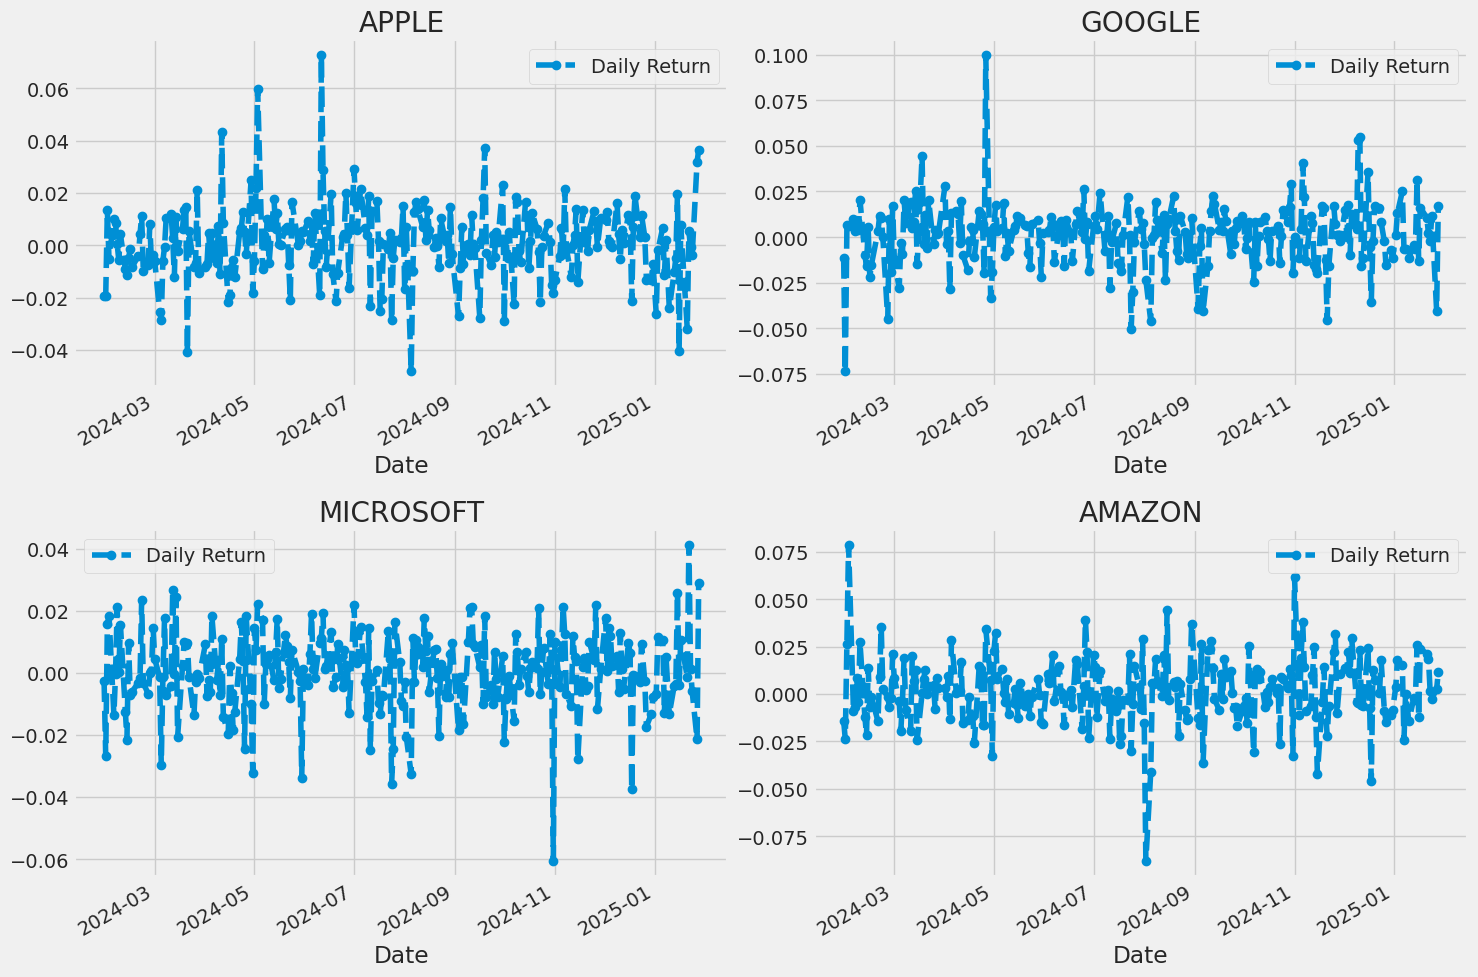

In [ ]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    # Use 'Adj Close' if available, otherwise fall back to 'Close'
    price_column = 'Adj Close' if 'Adj Close' in company.columns else 'Close'
    company['Daily Return'] = company[price_column].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

# Access the correct columns for plotting using tech_list as index
company_list[0]['Daily Return'].plot(ax=axes[0, 0], legend=True, linestyle='--', marker='o')  # AAPL
axes[0, 0].set_title('APPLE')

company_list[1]['Daily Return'].plot(ax=axes[0, 1], legend=True, linestyle='--', marker='o')  # GOOG
axes[0, 1].set_title('GOOGLE')

company_list[2]['Daily Return'].plot(ax=axes[1, 0], legend=True, linestyle='--', marker='o')  # MSFT
axes[1, 0].set_title('MICROSOFT')

company_list[3]['Daily Return'].plot(ax=axes[1, 1], legend=True, linestyle='--', marker='o')  # AMZN
axes[1, 1].set_title('AMAZON')

fig.tight_layout()

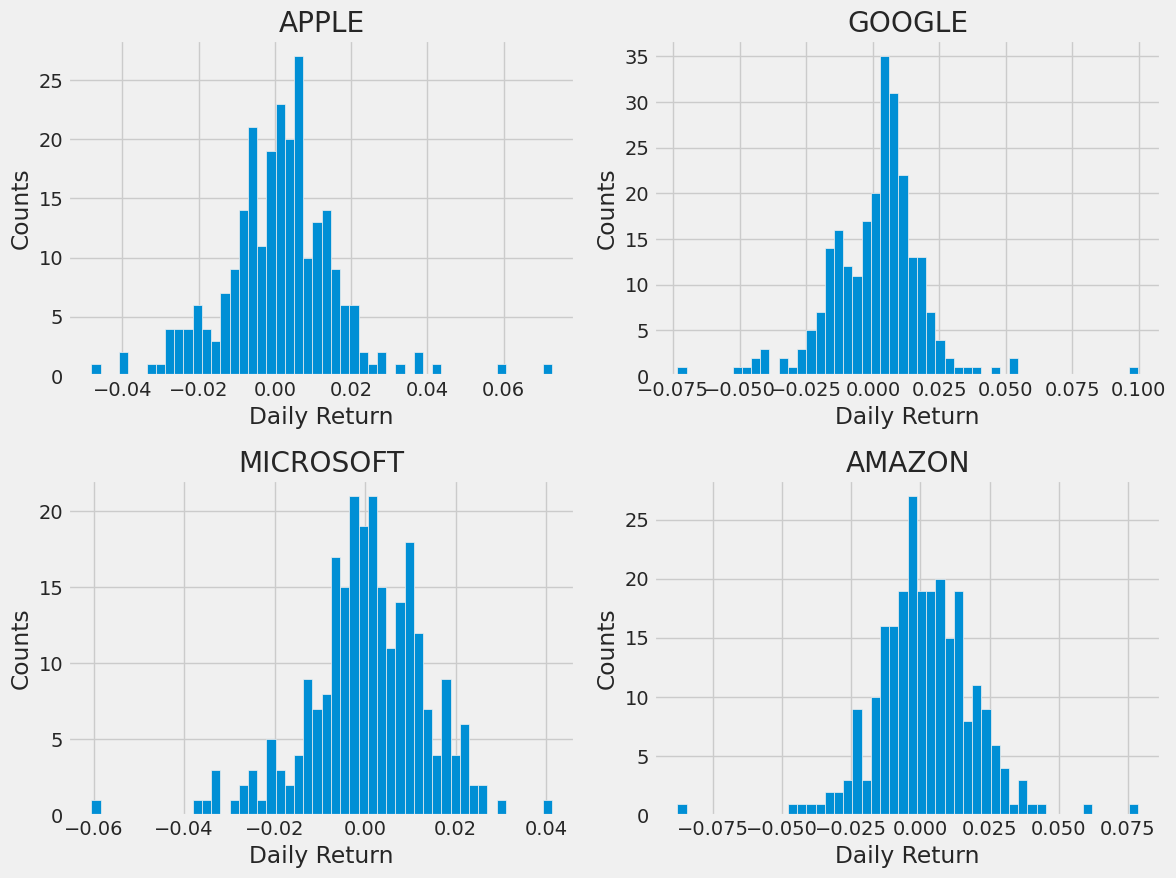

In [ ]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')

plt.tight_layout()

# 4. What was the correlation between different stocks closing prices?
Correlation is a statistic that measures the degree to which two variables move in relation to each other which has a value that must fall between -1.0 and +1.0. Correlation measures association, but doesn’t show if x causes y or vice versa — or if the association is caused by a third factor[1].

Now what if we wanted to analyze the returns of all the stocks in our list? Let's go ahead and build a DataFrame with all the ['Close'] columns for each of the stocks dataframes.

In [ ]:
import yfinance as yf

# Grab all the closing prices for the tech stock list into one DataFrame
closing_df = yf.download(tech_list, start=start, end=end)#['Adj Close']

# Make a new tech returns DataFrame
# Access 'Adj Close' using a tuple for MultiIndex: (ticker, 'Adj Close')
tech_rets = closing_df.pct_change()
tech_rets.head()

[*********************100%***********************]  4 of 4 completed


Price          Close                                    High            \
Ticker          AAPL      AMZN      GOOG      MSFT      AAPL      AMZN   
Date                                                                     
2024-01-29       NaN       NaN       NaN       NaN       NaN       NaN   
2024-01-30 -0.019246 -0.014015 -0.011560 -0.002758 -0.002081  0.002728   
2024-01-31 -0.019358 -0.023899 -0.073505 -0.026946 -0.024505 -0.016818   
2024-02-01  0.013341  0.026289  0.006418  0.015594 -0.000802  0.004717   
2024-02-02 -0.005405  0.078666  0.005816  0.018426  0.002033  0.079745   

Price                                Low                                \
Ticker          GOOG      MSFT      AAPL      AMZN      GOOG      MSFT   
Date                                                                     
2024-01-29       NaN       NaN       NaN       NaN       NaN       NaN   
2024-01-30 -0.001031  0.007488 -0.011130 -0.002580 -0.000948  0.005243   
2024-01-31 -0.060952  0.005496 -0.016643 -0.023219 -0.073474 -0.022733   
2024-02-01 -0.006662 -0.017625 -0.002875  0.005232  0.005016  0.011556   
2024-02-02 -0.005117  0.011397 -0.024861  0.075247 -0.028750  0.004380   

Price           Open                                  Volume            \
Ticker          AAPL      AMZN      GOOG      MSFT      AAPL      AMZN   
Date                                                                     
2024-01-29       NaN       NaN       NaN       NaN       NaN       NaN   
2024-01-30 -0.005573  0.008535  0.002408  0.015269  0.184827 -0.001392   
2024-01-31 -0.020425 -0.023024 -0.055970 -0.012856 -0.007010  0.112305   
2024-02-01 -0.016307 -0.007197 -0.011693 -0.012606  0.169785  0.522190   
2024-02-02 -0.022447  0.085456 -0.019487  0.004927  0.579986  0.530588   

Price                           
Ticker          GOOG      MSFT  
Date                            
2024-01-29       NaN       NaN  
2024-01-30  0.271152  0.365864  
2024-01-31  0.652010  0.429944  
2024-02-01 -0.418636 -0.359578  
2024-02-02  0.649903 -0.078698

In [ ]:
print(tech_rets.columns)


MultiIndex([( 'Close', 'AAPL'),
            ( 'Close', 'AMZN'),
            ( 'Close', 'GOOG'),
            ( 'Close', 'MSFT'),
            (  'High', 'AAPL'),
            (  'High', 'AMZN'),
            (  'High', 'GOOG'),
            (  'High', 'MSFT'),
            (   'Low', 'AAPL'),
            (   'Low', 'AMZN'),
            (   'Low', 'GOOG'),
            (   'Low', 'MSFT'),
            (  'Open', 'AAPL'),
            (  'Open', 'AMZN'),
            (  'Open', 'GOOG'),
            (  'Open', 'MSFT'),
            ('Volume', 'AAPL'),
            ('Volume', 'AMZN'),
            ('Volume', 'GOOG'),
            ('Volume', 'MSFT')],
           names=['Price', 'Ticker'])


Now we can compare the daily percentage return of two stocks to check how correlated. First let's see a sotck compared to itself.

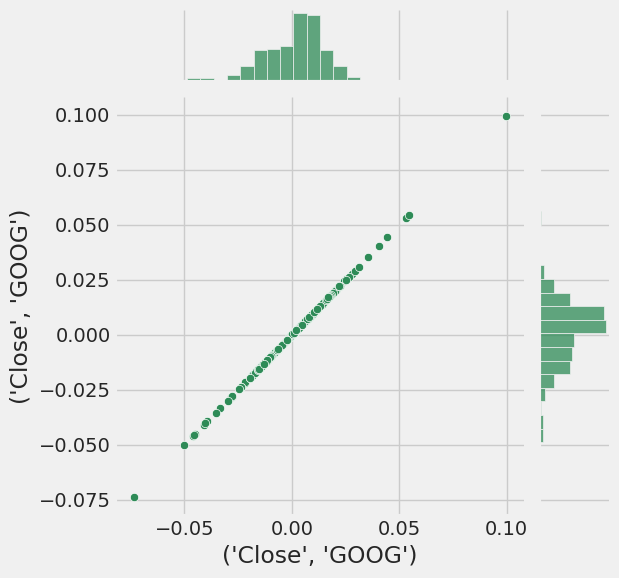

In [ ]:
# Extract the 'Close' price for 'GOOG'
gooog_rets = tech_rets['Close', 'GOOG']

# Now, plot the relationship between GOOG and itself
sns.jointplot(x=gooog_rets, y=gooog_rets, kind='scatter', color='seagreen')


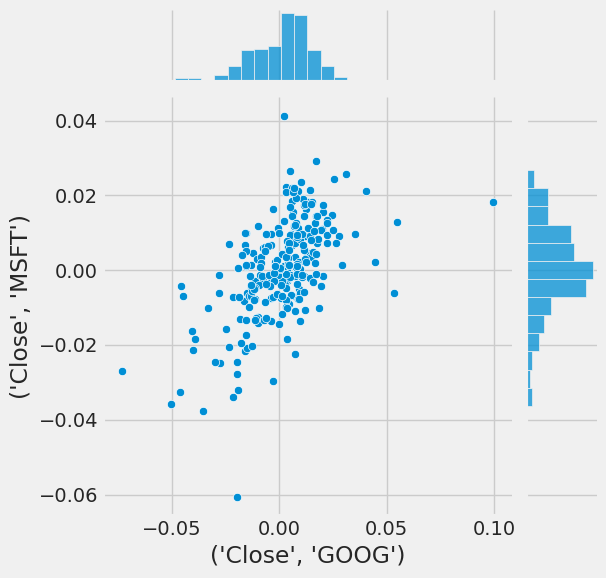

In [ ]:
# Extract the 'Close' price returns for 'GOOG' and 'MSFT'
goog_rets = tech_rets['Close', 'GOOG']
msft_rets = tech_rets['Close', 'MSFT']

# Now, plot the relationship between GOOG and MSFT returns
sns.jointplot(x=goog_rets, y=msft_rets, kind='scatter')


So now we can see that if two stocks are perfectly (and positivley) correlated with each other a linear relationship bewteen its daily return values should occur.

Seaborn and pandas make it very easy to repeat this comparison analysis for every possible combination of stocks in our technology stock ticker list. We can use sns.pairplot() to automatically create this plot

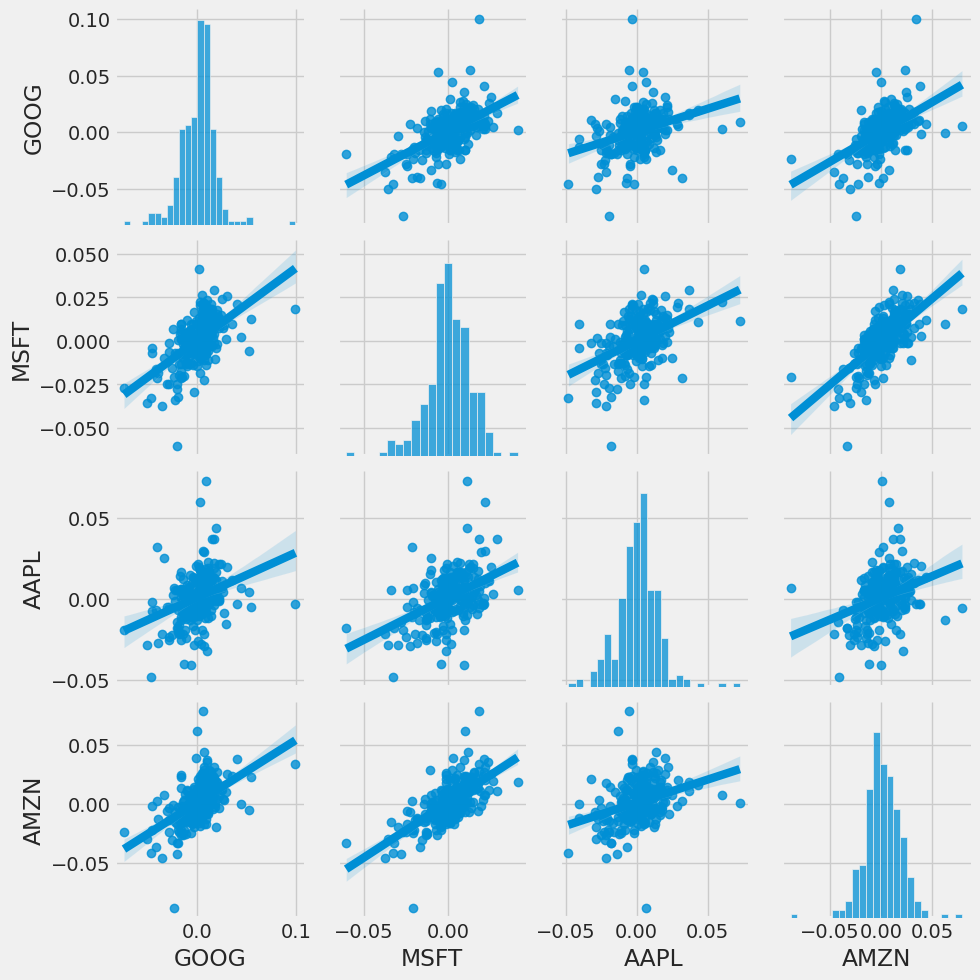

In [ ]:
# Subset the DataFrame to include only relevant stocks (e.g., 'GOOG' and 'MSFT')
relevant_stocks = ['GOOG', 'MSFT', 'AAPL', 'AMZN']  # Add as many as needed
#relevant_stocks = ['GOOG', 'MSFT']  # Add more stock symbols if needed
tech_rets_subset = tech_rets['Close'][['GOOG', 'MSFT', 'AAPL', 'AMZN']]  # Subset for relevant columns

# Now, use pairplot to compare only the selected stocks
sns.pairplot(tech_rets_subset, kind='reg')


Above we can see all the relationships on daily returns between all the stocks. A quick glance shows an interesting correlation between Google and Amazon daily returns. It might be interesting to investigate that individual comaprison.

While the simplicity of just calling sns.pairplot() is fantastic we can also use sns.PairGrid() for full control of the figure, including what kind of plots go in the diagonal, the upper triangle, and the lower triangle. Below is an example of utilizing the full power of seaborn to achieve this result.

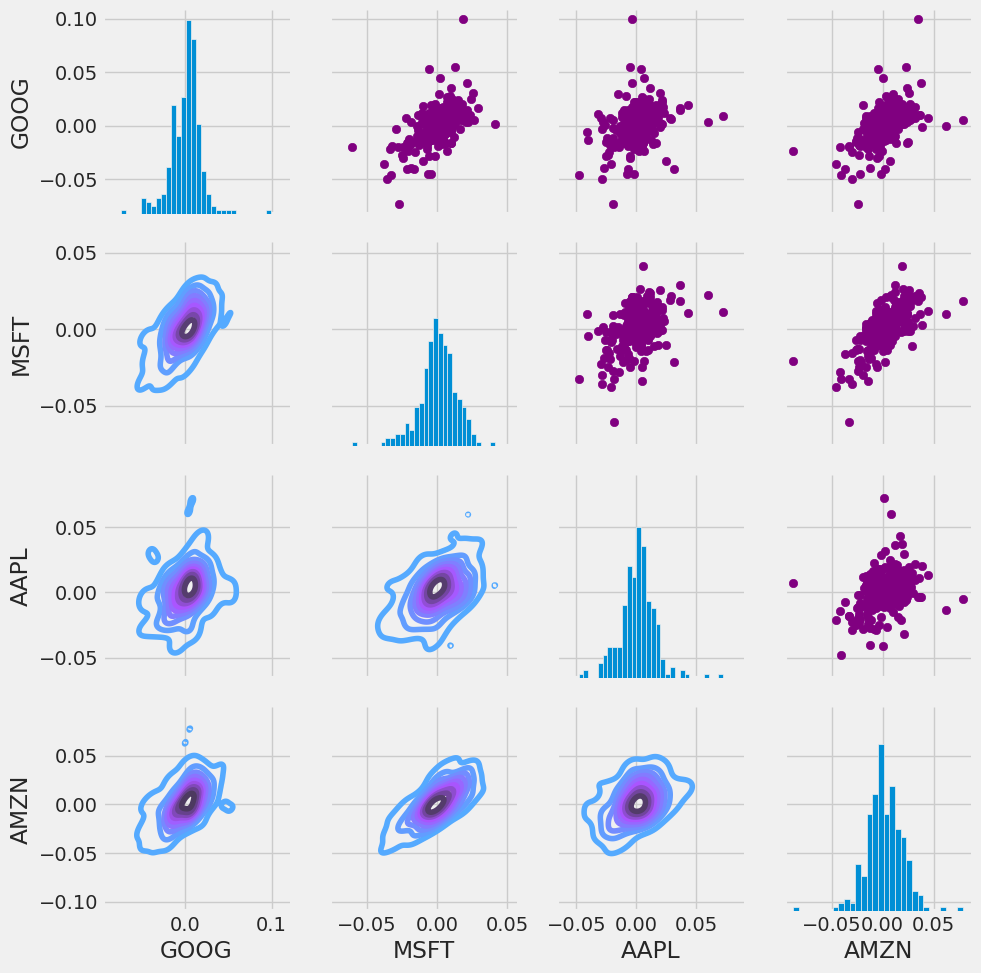

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Subset the DataFrame to include only relevant stocks (e.g., 'GOOG' and 'MSFT')
relevant_stocks = ['GOOG', 'MSFT', 'AAPL', 'AMZN']  # Add as many as needed
#relevant_stocks = ['GOOG', 'MSFT']  # Add more stock symbols if needed
tech_rets_subset = tech_rets['Close'][relevant_stocks].dropna()  # Subset for relevant columns

# Set up our figure by naming it returns_fig
return_fig = sns.PairGrid(tech_rets_subset)

# Using map_upper to specify what the upper triangle will look like
return_fig.map_upper(plt.scatter, color='purple')

# Define the lower triangle with a KDE plot and a color map
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

# Show the plot
plt.show()


In [ ]:
print(closing_df.columns)


MultiIndex([( 'Close', 'AAPL'),
            ( 'Close', 'AMZN'),
            ( 'Close', 'GOOG'),
            ( 'Close', 'MSFT'),
            (  'High', 'AAPL'),
            (  'High', 'AMZN'),
            (  'High', 'GOOG'),
            (  'High', 'MSFT'),
            (   'Low', 'AAPL'),
            (   'Low', 'AMZN'),
            (   'Low', 'GOOG'),
            (   'Low', 'MSFT'),
            (  'Open', 'AAPL'),
            (  'Open', 'AMZN'),
            (  'Open', 'GOOG'),
            (  'Open', 'MSFT'),
            ('Volume', 'AAPL'),
            ('Volume', 'AMZN'),
            ('Volume', 'GOOG'),
            ('Volume', 'MSFT')],
           names=['Price', 'Ticker'])


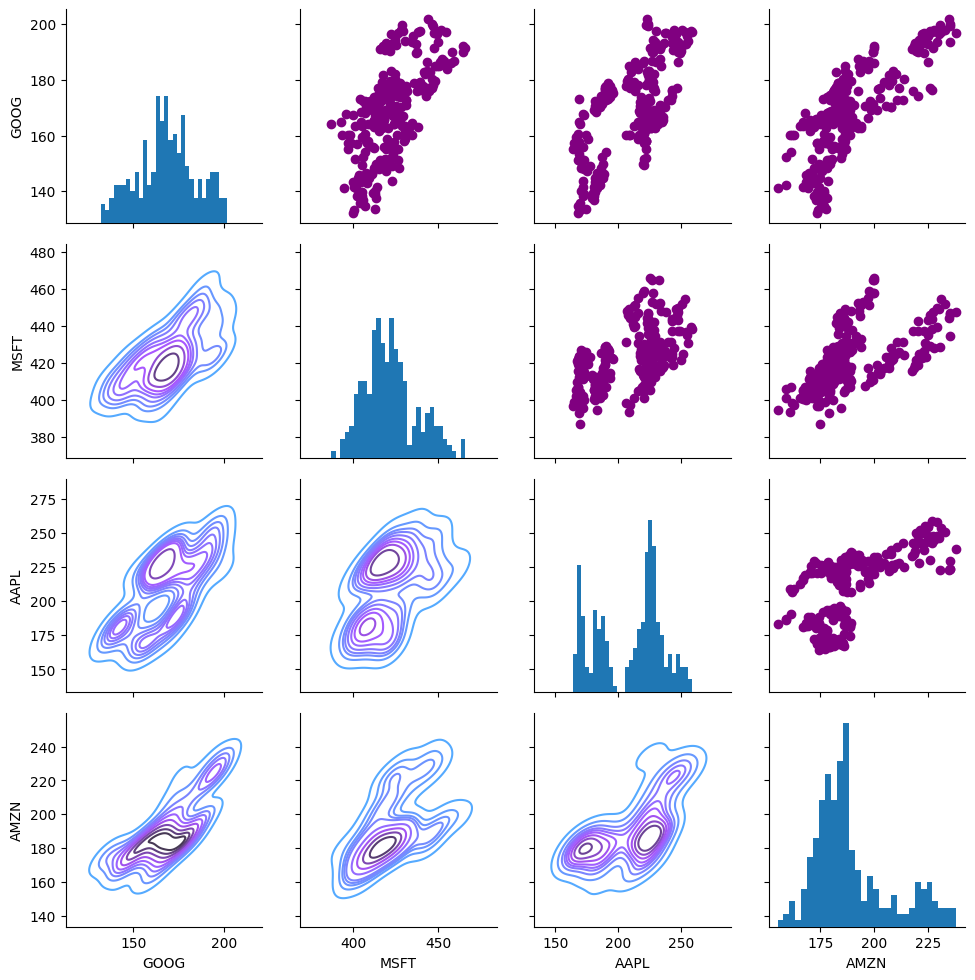

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Subset the DataFrame to include only 'Close' prices for relevant stocks (e.g., 'GOOG', 'MSFT', 'AAPL', 'AMZN')
relevant_stocks = ['GOOG', 'MSFT', 'AAPL', 'AMZN']

# Use the MultiIndex to filter the 'Close' prices for the relevant tickers
closing_df_subset = closing_df.xs('Close', level='Price', axis=1)[relevant_stocks].dropna()

# Set up our figure by naming it returns_fig, call PairGrid on the subsetted DataFrame
returns_fig = sns.PairGrid(closing_df_subset)

# Using map_upper to specify what the upper triangle will look like
returns_fig.map_upper(plt.scatter, color='purple')

# Define the lower triangle with a KDE plot and a color map
returns_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist, bins=30)

# Show the plot
plt.show()


Finally, we could also do a correlation plot, to get actual numerical values for the correlation between the stocks' daily return values. By comparing the closing prices, we see an interesting relationship between Microsoft and Apple.

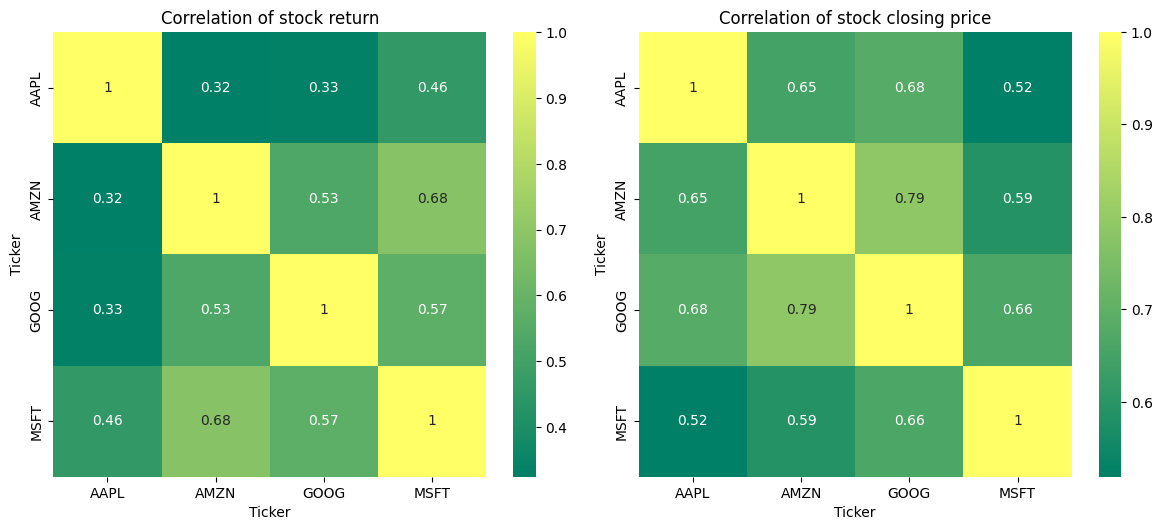

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming closing_df has the stock prices and it's MultiIndex
# Calculate daily returns
tech_rets = closing_df.xs('Close', level='Price', axis=1).pct_change()

# Now plotting the heatmaps
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.xs('Close', level='Price', axis=1).corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

plt.tight_layout()
plt.show()


Just like we suspected in our PairPlot we see here numerically and visually that Microsoft and Amazon had the strongest correlation of daily stock return. It's also interesting to see that all the technology comapnies are positively correlated.

# 5. How much value do we put at risk by investing in a particular stock?
There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.

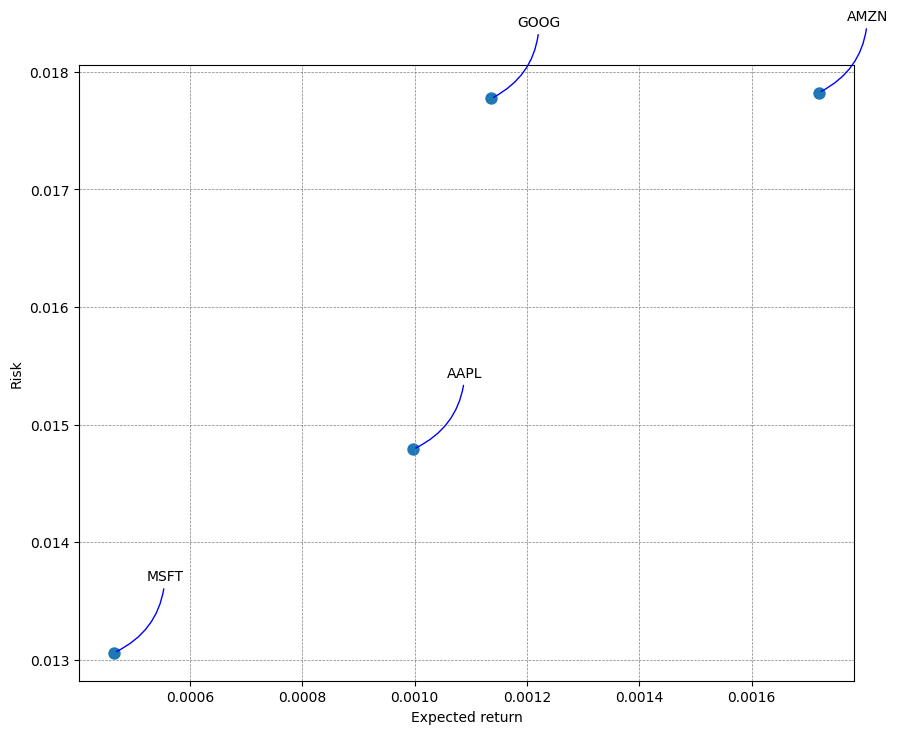

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming tech_rets is already defined
rets = tech_rets.dropna()

area = np.pi * 20  # Set the area for the scatter plot points

plt.figure(figsize=(10, 8))

# Scatter plot
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

# Annotate each point with the stock symbol
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom',
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

# Add gridlines
plt.grid(True, which='both', axis='both', linestyle='--', linewidth=0.5, color='gray')

# Show the plot
plt.show()


# 6. Predicting the closing price stock price of APPLE inc:

In [ ]:
# Get the stock quote for AAPL
# Use yf.download to ensure compatibility with potential Yahoo Finance changes
df = yf.download('AAPL', start='2020-01-01', end=datetime.now())

# OR try pdr.DataReader if yf.download fails
# df = pdr.DataReader('AAPL', 'yahoo', start='2012-01-01', end=datetime.now())


# Show the data
df

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-01-02,72.796028,72.856621,71.545395,71.799881,135480400
2020-01-03,72.088295,72.851761,71.862892,72.020432,146322800
2020-01-06,72.662704,72.701485,70.953995,71.206062,118387200
2020-01-07,72.320976,72.929322,72.100418,72.672409,108872000
2020-01-08,73.484337,73.787300,72.022843,72.022843,132079200
...,...,...,...,...,...
2025-01-22,223.830002,224.119995,219.789993,219.789993,64126500
2025-01-23,223.660004,227.029999,222.300003,224.740005,60234800


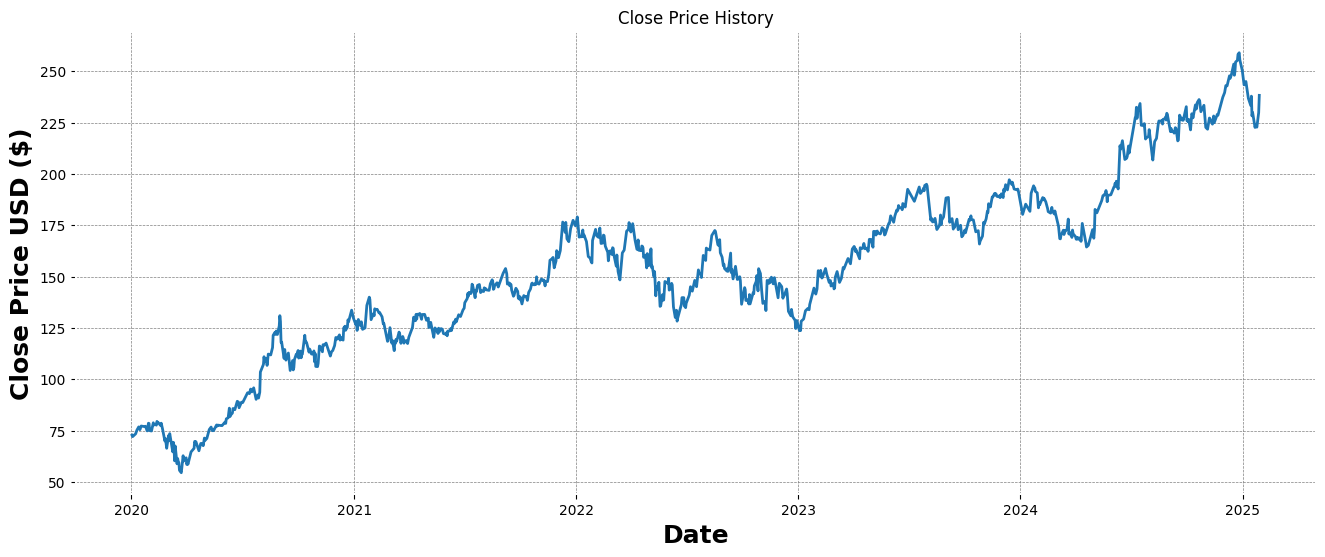

In [ ]:
import matplotlib.pyplot as plt

# Assuming df is already defined with the stock data
plt.figure(figsize=(16, 6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)

# Add gridlines to the plot
plt.grid(True, which='both', axis='both', linestyle='--', linewidth=0.5, color='gray')

plt.show()


In [ ]:
# Create a new dataframe with only the 'Close column
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

1212

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Ensure 'df' is your DataFrame and it has a 'Close' column
dataset = df[['Close']].values  # Select only the 'Close' column and convert to numpy array

# Initialize the MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Apply the scaler
scaled_data = scaler.fit_transform(dataset)

# Show the scaled data
scaled_data


array([[0.08941492],
       [0.0859543 ],
       [0.08876301],
       ...,
       [0.8227962 ],
       [0.8574155 ],
       [0.89848921]])

In [ ]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.08941492, 0.0859543 , 0.08876301, 0.08709205, 0.09278057,
       0.1004129 , 0.10124247, 0.1090999 , 0.10402745, 0.1024395 ,
       0.10706141, 0.11119745, 0.10863765, 0.10997689, 0.11179009,
       0.11069965, 0.09960699, 0.10996499, 0.11784611, 0.11728902,
       0.10027062, 0.09926321, 0.11133974, 0.11442111, 0.11887709,
       0.11363829, 0.11544392, 0.11313948, 0.12215589, 0.11938792,
       0.11948305, 0.11241477, 0.11790304, 0.11395908, 0.10534654,
       0.08768174, 0.0756836 , 0.08111251, 0.05838726, 0.05819708,
       0.08843028, 0.07715661, 0.09309882, 0.0814333 , 0.07681217,
       0.04965594, 0.07242871, 0.06065619, 0.02834426, 0.06367351,
       0.02119286, 0.03384437, 0.02649107, 0.02424581, 0.00578529,
       0.        , 0.02674049, 0.0251249 , 0.04047315, 0.02776216])]
[0.0361608874157453]

[array([0.08941492, 0.0859543 , 0.08876301, 0.08709205, 0.09278057,
       0.1004129 , 0.10124247, 0.1090999 , 0.10402745, 0.1024395 ,
       0.10706141, 0.11119745, 0.108

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1152/1152 ━━━━━━━━━━━━━━━━━━━━ 59s 49ms/step - loss: 0.0047


In [ ]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 317ms/step


7.521235924074594

<ipython-input-62-2dcb79311990>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


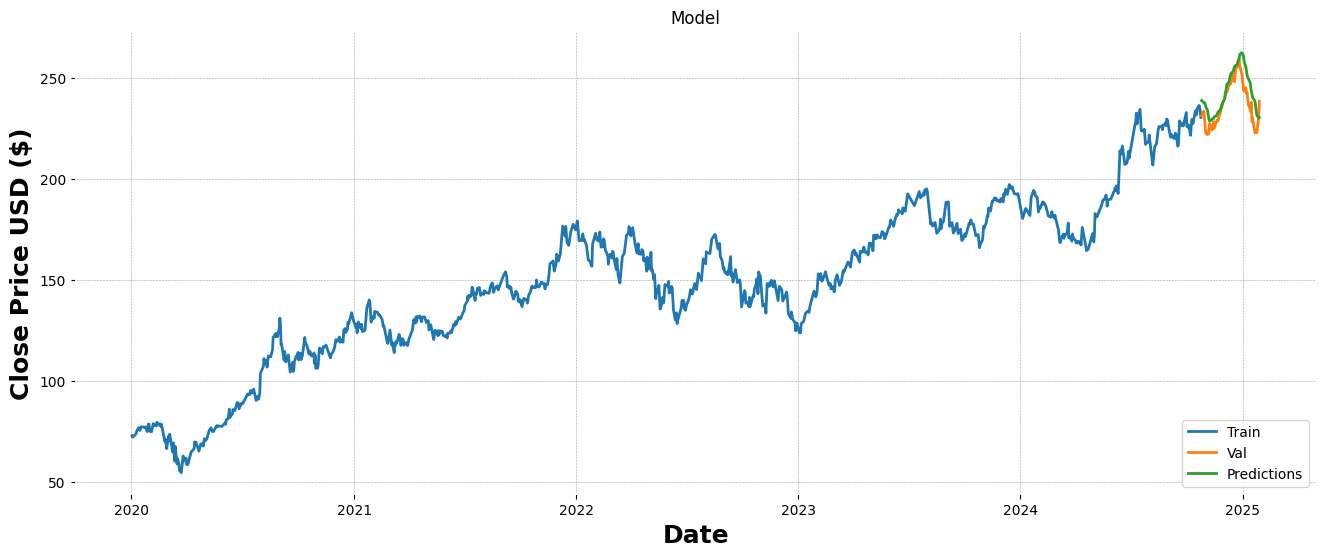

In [ ]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

# Create a new dataframe with only the 'Close column'
data = df[['Close']].copy() # Create a copy to avoid modifying the original df

In [ ]:
# Show the valid and predicted prices
valid

Price,Close,Predictions
Ticker,AAPL,
Date,,
2024-10-25,231.155685,238.703598
2024-10-28,233.143494,237.904510
2024-10-29,233.413193,237.592331
2024-10-30,229.847122,237.601868
2024-10-31,225.661728,237.116180
...,...,...
2025-01-22,223.830002,235.720886
2025-01-23,223.660004,233.358246


In [ ]:
print(df.columns)


MultiIndex([( 'Close', 'AAPL'),
            (  'High', 'AAPL'),
            (   'Low', 'AAPL'),
            (  'Open', 'AAPL'),
            ('Volume', 'AAPL')],
           names=['Price', 'Ticker'])


In [ ]:
# Extract data for 'AAPL' (or any other stock)
aapl_data = df.xs('AAPL', level='Ticker', axis=1)

# Check the first few rows to ensure correct extraction
print(aapl_data.head())


Price           Close       High        Low       Open     Volume
Date                                                             
2020-01-02  72.796028  72.856621  71.545395  71.799881  135480400
2020-01-03  72.088295  72.851761  71.862892  72.020432  146322800
2020-01-06  72.662704  72.701485  70.953995  71.206062  118387200
2020-01-07  72.320976  72.929322  72.100418  72.672409  108872000
2020-01-08  73.484337  73.787300  72.022843  72.022843  132079200


In [ ]:
# prompt: code for finding accuracy of the model

import numpy as np

# Assuming 'predictions' and 'y_test' are already defined from your model
# and contain the predicted and actual values, respectively.

# Calculate the Mean Absolute Percentage Error (MAPE)
errors = np.abs((y_test - predictions) / y_test)
mape = np.mean(errors) * 100  # Express as a percentage

print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

# Calculate the accuracy as 1 minus MAPE (but consider the limitations of MAPE)
accuracy = 100 - mape

print(f"Accuracy (based on MAPE): {accuracy:.2f}%")

Mean Absolute Percentage Error (MAPE): 2.53%
Accuracy (based on MAPE): 97.47%


# Summary
In this notebook, you discovered and explored stock data.

Specifically, you learned:

How to load stock market data from the YAHOO Finance website using yfinance.
How to explore and visualize time-series data using Pandas, Matplotlib, and Seaborn.
How to measure the correlation between stocks.
How to measure the risk of investing in a particular stock.
Do you have any questions? Ask your questions in the comments below and I will do my best to answer.